
# COGS 118A - Final Group Project 

# Names

- Deepansha Singh
- Raina Song
- Ilya Kogan
- Winah Ruiz


# Abstract 
Natural language processing (NLP) has been making headlines all over the news in recent months due to the release and gaining popularity of ChatGPT (chatbot developed by OpenAI).
To take a closer look at the field of NLP, we plan to implement a sentiment analysis, a NLP technique that is used to determine the text attitude on a scale from -1 to 1 where absolute positive input has score 1, absolute negative input has score of -1, and a score of 0 is for neutral sentiment.
In this project we examine how general a sentiment analysis tool can be 
(e.g. when trained on data on a specific topic how well it can perform on other topics that it didn’t encounter before or general topicless data) 
by using different sampling techniques 
(k-fold Cross Validation and Nested Cross Validation) 
with different classifiers 
(Support Vector Classifier, k-Nearest Neighbors algorithm, Decision Trees, etc.) 
and quantifying their performance using various error metrics 
(precision, recall, or accuracy scores).
We will be using social media data from Reddit with sentiment labels to train our models, choose the best one according to an error metric, and then test how well our “best” model performs on a new dataset found on Twitter.


# Background

In previous studies, the generalisability and interoperability of NLP models in tasks such as fake news detection<a name="fakenews"></a>[<sup>[1]</sup>](#fakenews)<a name="fakenews2"></a>[<sup>[2]</sup>](#fakenews2), hate speech detection<a name="hatespeech"></a>[<sup>[3]</sup>](#hatespeech), and sentiment analysis<a name="sentian"></a>[<sup>[4]</sup>](#sentian) were explored. It was found that generalisability is a challenge for NLP algorithms, as they generalize poorly on new and unseen datasets<a name="fakenews"></a>[<sup>[1]</sup>](#fakenews). However, robust NLP models are desired to perform large-scale, cross-categorical classification tasks on the internet or social media platforms. Some studies suggest that the biases found in models may be due to the small datasets the models are trained on, which make the models prone to overfitting issues<a name="fakenews"></a>[<sup>[1]</sup>](#fakenews). Larger and more diverse datasets are required to reduce biases in trained models. It was suggested that cross-dataset testing is a useful tool to evaluate model generalisability performance realistically<a name="hatespeech"></a>[<sup>[3]</sup>](#hatespeech). Due to such reasons, our project is motivated to explore the generalisability of NLP sentiment analysis models on different datasets pertaining to different subject matter.


# Problem Statement

We are performing one of the techniques to quantify text, sentiment analysis, using different classifiers. We are then examining how well our model trained on The Reddit Climate Change Dataset<a name="redditclimate"></a>[<sup>[5]</sup>](#redditclimate) can perform on Twitter and Reddit Sentimental Analysis Dataset<a name="twitterredditsentian"></a>[<sup>[6]</sup>](#twitterredditsentian) and FIFA World Cup 2022 Tweets<a name="fifatweets"></a>[<sup>[7]</sup>](#fifatweets) by using different error metrics (precision, recall, or accuracy scores) and how does a choice of error metric change what is the best model (i.e. whether we have a completely best model or not). One potential solution to our problem is to use CountVectorizer to do the preprocessing, then extract features using tf-idf frequincies approach after which fit some classifiers (e.g. Support Vector Classifier, k-NN, Decision Trees, and AdaBoost) on The Reddit Climate Change Dataset<a name="redditclimate"></a>[<sup>[5]</sup>](#redditclimate). Then, use an error metric, for example, precision or recall and a confusion matrix for visualizations to determine which Classifier gives the best performance on different datasets using, for example, k-fold Cross Validation or Nested Cross Validation.

# Data


### (pavellexyr) The Reddit Climate Change Dataset: ###
Retrieved from: https://www.kaggle.com/datasets/pavellexyr/the-reddit-climate-change-dataset

There are two .csv files, one containing comments from Reddit on climate change and the other containing posts on climate change. For this project, we will only be using the .csv file with comments as there is already sentiment analysis done on the 4.6 million observations collected.

An observation in this dataset consists of:
* Type of datapoint (comment)
* Unique ID of the comment
* Unique ID of the comment’s subreddit
* The name of the subreddit the comment was found on
* If the comment’s subreddit is NSFW
* The timestamp (UTC) of the comment
* Permalink to the comment
* Body text of the comment
* Analyzed sentiment for the comment as a continuous value from [-1, 1]
* Comment’s score (votes on Reddit)

### (cosmos98) Twitter and Reddit Sentimental analysis Dataset: ###
Retrieved from: https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset

There are two .csv files, one containing comments from Reddit (36k observations) and the other containing tweets from Twitter (162k observations). The Twitter dataset was extracted with the focus on tweets people made about the Indian Prime Minister Narendra Modi. The Reddit dataset has no indication of having a specific area or topic they were sourced from. 

Both datasets only have two variables:
* The text of the comment or tweet
* The category/sentiment of the text {-1, 0, 1}

### (tirendazacademy) FIFA World Cup 2022 Tweets:  ###
Retrieved from: https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets

There is one .csv file containing tweets regarding the 2022 FIFA World Cup, a dataset of about 22k observations.

An observation in this dataset contains:
* ID (index) of the observation
* Date the tweet was created
* Number of likes the tweet had
* Source of the tweet (Twitter of iPhone, Twitter for Android)
* The body text of the tweet
* Sentiment of the tweet as strings: “positive”, “neutral”, or “negative”


For all the datasets discussed above, there are only two variables we are concerned with: the text of the comment/tweet and the sentiment the text was already given. Due to some datasets being incredibly large, only the first 100k observations of each dataset will be used. 

All datasets will undergo further data cleaning. To the best of our ability, we will filter our dataset to only have English detected text using the langdetect library and regex. Other unusable observations (such as rows containing NaN values) will also be excluded. This results in slightly less than the upper limit of 100k observations initially taken from each dataset. In addition, the existing numeric labels for sentiment some datasets may have will be changed to string values of “positive”, “negative”, and “neutral” to be consistent with each other and only have 3 total classes for classification. 

The full code for cleaning the files used up to this point are in the “COGS118A replacement data cleaning.ipynb” file in this repository. Below will be code snippets, mainly of the functions created to clean the data. For demonstration purposes, these will just be example variable names instead of what was actually used in practice. 


In [4]:
"""
Libraries and global variables to be used for cleaning and limiting collected data to 100k observations at most. 
"""

import numpy as np
import pandas as pd

row_count = 1000
max_obv = 100

#https://pypi.org/project/langdetect/
### uncomment this to install, then comment and restart kernel ###
# %%capture
# !pip install langdetect

from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
### regex for more lang checking
import re

Taking the first 100k observations of a dataset and putting it into an initial DataFrame object.

In [2]:
data_text = []
data_sentiment = []
i = 0
for chunk in pd.read_csv('dataset.csv', chunksize=row_count):
  if i < max_obv:
    data_text += chunk['text'].tolist()
    data_sentiment += chunk['sentiment'].tolist()
    i += 1
  else:
    break;

FileNotFoundError: [Errno 2] No such file or directory: 'dataset.csv'

In [3]:
df = pd.DataFrame(data={'text': data_text, 'sentiment': data_sentiment})
df = df.dropna()

Function to validate a text body. Valid text will be non-empty strings that are not solely whitespace of at least length 1. Regex and langdetect is used to keep observations that have Latin characters (so that it may be able to filter out text using solely Korean characters for example).

In [ ]:
def validate_line(line):
    if not line:
        return np.nan
    if line == "":
        return np.nan
    if not bool(line.strip()):
        return np.nan
    if len(line) < 1:
        return np.nan
    
    if bool(re.match('^(?=.*[a-zA-Z])', line)):
        try:
            if detect(line) != 'en':
                return np.nan
        except LangDetectException:
            return np.nan
    return True

Function to check if text body is English (detect returns 'en') for the entire dataset. 
* text_col takes a DataFrame.Series: df['text']
* sentiment_col takes a DataFrame.Series: df['sentiment']
Returns 3 lists of the same length, truncating the last chunk of observations that are less than 1000.

In [ ]:
def check_en(text_col, sentiment_col):
    en_text = text_col.tolist()
    en_sentiment = sentiment_col.tolist()
    lang = []
    
    start = 0
    for i in np.arange(row_count, len(en_text), row_count):
        #observations <1000 at the end will be lost but impact is negligible
        #!!!uncomment print statement below to show progress (recommended)!!!
#         print(start, i)
        lang += [validate_line(x) for x in en_text[start:i]]
        start = i
    print("Finished English check")
    ### all three return values should be of the same length
    return en_text[0:len(lang)], en_sentiment[0:len(lang)], lang

Putting the returned lists from check_en into a new DataFrame. df['english'] will be dropped after removing all rows with NaN values (non-English, non valid text bodies).

In [ ]:
en_data_text, en_data_sentiment, en_data_lang = check_en(df['text'], df['sentiment'])

en_df = pd.DataFrame(data={'text': en_data_text, 'sentiment': en_data_sentiment, 'english': en_data_lang})
en_df = en_df.dropna()
en_df = en_df.drop(columns=['english'])

Function to change numeric sentiment values into string values, otherwise it will just return the input value (if it was already string).

In [ ]:
def sentiment_to_string(sentiment):
    if type(sentiment) == int or type(sentiment) == float:
        if sentiment < 0:
            return "negative"
        if sentiment > 0:
            return "positive"
        return "neutral"
    else:
        return sentiment

In [ ]:
en_df['sentiment'] = en_df['sentiment'].apply(sentiment_to_string)

Further cleaning is done to remove user handles, most links, and most special characteres. Stemming is also done to simplify tokens, which are then put back together as a single body of text.

In [3]:
#packages needed
import pandas as pd
import regex as re
import nltk
from nltk import PorterStemmer
ps = PorterStemmer()

In [4]:
def further_cleaning(df):
  #remove urls
  df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x, flags=re.MULTILINE))
  #remove user handles
  df['text'] = df['text'].apply(lambda x: re.sub(r'@[\w]*', '', x))
  #remove special characters
  df['text'] = df['text'].str.replace("[^a-zA-Z#]", " ")
  #remove strings less than length 3
  df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

  #tokenizing and stemming
  token = df['text'].apply(lambda x : x.split())
  token = token.apply(lambda x: [ps.stem(i) for i in x])
  
  #rejoin tokens
  for i in range(len(token)):
    token[i] = ' '.join(token[i])
  df['text'] = token
  return df


Final DataFrame after this line with the prefix "new_"

In [ ]:
new_df = further_cleaning(en_df)

# Proposed Solution

We have considered 3 different approaches for the proposed solution. For all three approaches, we aim to train different classifiers on a labelled dataset that we mentioned before, and test them on different labelled datasets to achieve the cross-dataset testing as mentioned in the Background section. This way, we can try to find out the generalisability of the models on different datasets and answer our research question. Also, in each approach, different classifiers are evaluated and tested against our metrics and we will select the best model in each approach. For approaches 1 and 2, we are looking at supervised machine learning methods for the classifiers. And for approach 3, which is beyond the scope of the class (but if we have extra time) we will also do some exploration for some deep learning package’s accuracy on the dataset.
<br>

**Approach #1 : Supervised ML, using scikit packages to take care of BOTH the data preprocessing and also the NLP feature extraction.**

All the preprocessing will be taken care of by the CountVectorizer.
Please note that we are following this tutorial from the Scikit documentation <a name="scikit1"></a>[<sup>[8]</sup>](#scikit1). Since we haven’t previously worked with natural language processing problems in class before, we are  following this tutorial’s methods for feature extraction. Additionally, we did a lot of thorough, extensive research on various approaches for extracting features for text input. Some features <a name="scikit1"></a>[<sup>[8]</sup>](#scikit1)<a name="featextract"></a>[<sup>[9]</sup>](#featextract) we would be looking at are bag-of-words feature, tf-idf frequencies <a name="wiki"></a>[<sup>[10]</sup>](#wiki), and word embeddings <a name="mediium"></a>[<sup>[11]</sup>](#medium). 

Specifically, for the tf-idf frequencies, based on the research we did <a name="scikit1"></a>[<sup>[8]</sup>](#scikit1), <a name="wiki"></a>[<sup>[12]</sup>](#wiki), tf-idf is a great way to see how important each of these words in the text are; tf-idf stands for term frequency-inverse document frequency. For tf-idf, we need to use the "CountVectorizer" object from scikit <a name="scikit1"></a>[<sup>[8]</sup>](#scikit1) to get the frequencies and then we can use that for this tf-idf computation. While the tf part is more focused on seeing how frequently each of these words are in our training set, the idf portion of the computation is more focused around information theory aspect and assessing the relevance of the word <a name="wiki"></a>[<sup>[10]</sup>](#wiki).

After extracting all the various features, the next step would be to run the various classifiers <a name="scikit2"></a>[<sup>[12]</sup>](#scikit2) on the training dataset. Specifically, these are the following classifiers we are planning on running on these features as discussed in class: Support Vector Classifier, K-nearest neighbors, Ada Boost, and Decision trees.
Some new classifiers, which we haven’t learned in class yet, which we are also planning to investigate in further detail are neural net, Naive Bayes, etc. <a name="scikit2"></a>[<sup>[12]</sup>](#scikit2). We will be comparing these classifiers on different datasets and select the best model based on our metrics. 

In addition, for the training sampling techniques, we will be using the following to do comparisons between the different methods that we learned in class: K-fold validation with training, with training/validation/testing, and Nested cross validation. 
<br>

**Approach #2: Supervised ML, doing data preprocessing and above feature extraction from scratch.**

The steps for this approach will be similar to the first approach, however for the data preprocessing we will be doing everything from scratch instead of using CountVectorizer. 
Specifically, these are some of the data preprocessing techniques that we have researched about <a name="empstudy"></a>[<sup>[13]</sup>](#empstudy)<a name="featextractreview"></a>[<sup>[14]</sup>](#featextractreview) for natural language processing sub-field of machine learning are lemmatization/stemming, tokenization, and looking at part of speech for text.
Additionally, we will be looking at more research papers and trying to see more data preprocessing techniques for text input data.
We will again compare and contrast each classifier, and select the best model in this approach.
<br>

**Approach #3 (Above & Beyond, Extra work outside of class algorithms): Running on pre-trained neural networks.**

Along with supervised ML approaches, there has been a lot of extensive, thorough research being done in deep learning space for Natural Language Processing. Google’s BERT and Open AI’s GPT-3 <a name="top8"></a>[<sup>[15]</sup>](#top8) are just two of the popular NLP deep learning models out there. 
We will be loading these pretrained models in the Pytorch library. This is a library we haven’t learned in class, but is widely used in deep learning research problems. Specifically, this is new Machine learning content, in deep learning and transformers space, and we spent time understanding these really cool new ML concepts (links below). 
After performing the above tasks for the supervised machine learning component of the project, we will also be comparing the accuracy of this model to various pretrained models from HuggingFace for sentiment analysis, and see which model provides best accuracy, specifically BERT pretrained model <a name="huggingface1"></a>[<sup>[16]</sup>](#huggingface1) and Chat GPT-2 pretrained model <a name="huggingface2"></a>[<sup>[17]</sup>](#huggingface2).

If time permits, we will also try to train a neural network from scratch for sentiment analysis and do further research on research papers in this space. 

For all these different classification models, after we selected the best model by observing the results they produce on the labelled datasets, we will test them against an unlabelled dataset and see how accurate they seem on the unlabelled dataset compared to the labelled ones they were trained and tested on. In such a way, we can see not only the cross-dataset testing results on the generalisability of models we selected, and also the predictability of the models when they don't have labelled data.


# Evaluation Metrics

We will be using various different error metrics such as precision, recall, and overall accuracy score to evaluate how well those classifiers can generalize in sentiment analysis given different subject matter, and if there is a significant difference in performance between each classifier. Precision and recall will also be used to judge how sensitive our classifiers are to negative and positive sentiments, providing insight as to what pitfalls they are subject to in the human language such as sarcasm.

$$Precision = {True Positives \over Predicted Positives}$$
$$Recall = {True Positives \over Actually Positive}$$
$$Overall Accuracy = {True Positives + True Negatives \over Total Predictions Made}$$

We will also use a confusion matrix<a name="confusionMatrix"></a>[<sup>[18]</sup>](#confusionMatrix) to visually represent True Positives, False Negatives, False Positives, and True Negatives, since they are the basis using which precision, recall, and overall accuracy are evaluated. A general Confusion Matrix looks like this:

|                    |Predicted Positive(PP)| Predicted Negative(PN)|
| ------------------ | -------------------- | --------------------- |
| Actual Positive(P) |    True Positives    |    False Negatives    |
| Actual Negative(N) |    False Positives   |    True Negatives     |

# Preliminary results


### Training The Model Using The Reddit Climate Change Dataset and KNeighborsClassifier ###

In [2]:
en_climate_df = pd.read_csv('en_climate_df.csv')
en_climate_df

,Unnamed: 0,text,sentiment
0,0,Yeah but what the above commenter is saying is...,positive
1,1,Any comparison of efficiency between solar and...,negative
2,2,I'm honestly waiting for climate change and th...,negative
3,3,Not just Sacramento. It's actually happening a...,neutral
4,4,I think climate change tends to get some peopl...,positive
...,...,...,...
97744,97995,It’s almost like climate change is real. Huh.,positive
97745,97996,I'm not sure I agree. More Americans are consi...,positive
97746,97997,If 40 billion could fix climate change why did...,neutral
97747,97998,"There are a lot of answers to climate change, ...",neutral


In [3]:
X = en_climate_df['text']
Y = en_climate_df['sentiment']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, train_size=0.6)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier

countVectorizer = CountVectorizer()
X_train = countVectorizer.fit_transform(X_train)

In [6]:
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
X_train = tf_transformer.transform(X_train)

In [7]:
clf = KNeighborsClassifier(3).fit(X_train, Y_train)

In [8]:
tester = ['yayyy!', 'terrible', "she walked to the right", "woohoo", "I don't feel good", "sad", "feel kinda blue"]
X_new_counts = countVectorizer.transform(tester)
X_new_tfidf = tf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
predicted

array(['positive', 'negative', 'positive', 'positive', 'positive',
       'negative', 'neutral'], dtype=object)

In [10]:
# Test with original test set
X_new_counts = countVectorizer.transform(X_test)
X_new_tfidf = tf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
predicted

array(['positive', 'neutral', 'negative', ..., 'positive', 'positive',
       'negative'], dtype=object)

In [11]:
# Get accuracy on the original test set
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predicted)

0.5167519181585678

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

#array of first 50 odd integers
k_values = list(range(1, 100, 2))

#data preprocessing
X_counts = countVectorizer.transform(X)
X_tfidf = tf_transformer.transform(X_new_counts)

#cross-validation w/ 5 folds to evaluate the performance of kNN model for each value of k
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_tfidf, Y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    
#Choose the best k value
best_k = k_values[np.argmax(cv_scores)]
print("Best k value: {}".format(best_k))

#line plot to visualize the accuracy scores for each k
plt.plot(k_values, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py", line 454, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/series.py", line 893, in __array__
    return np.asarray(self._values, dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: "* Expensive, well-organized, and non-stigmatized prostitution. With better living standards there are fewer people forced into prostitution, thus decreasing the supply and giving better bargaining power to the workers. No more prostitution ghetto in poor cities and countries alongside their protection rackets and drug dealers. A character can be seen working a decidedly middle-class job like a ballet instructor, one of their students's mom is publicly known as being a prostitute, treated like any other parent.\n\n* Far less violent crime. When most criminal gangs can actually do honest work for a decent living, the stakes are lower and they are no longer willing to risk jail just to keep their territory. They will still steal and smuggle, but when confronted by civilians or outnumbered police, they just disengage instead of resorting to beatings/shoot out. The police might mention it's been years since they were forced to use their baton.\n\n* Way faster tech development. Even if the Contingency won't outright research cold fusion or eliminate cancer, nearly twice the world population and better education standards mean more researchers and potential market. Climate change and pandemics are kept at bay, and what we'd consider futuristic industries like space and robotics are perfectly mundane. A defeat in war might merely mean figuring out the robotic army factory has been surrounded by the enemy with no human blood ever spilled, then filling red tape on where the loser's going to be exiled, a perfectly habitable artificial island with more amenities than our New York or a Moon station where people's biggest annoyance is solar storm delaying season premiere of their favorite show."

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_classification.py", line 215, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neighbors/_base.py", line 454, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/series.py", line 893, in __array__
    return np.asarray(self._values, dtype)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Yeah but what the above commenter is saying is their base doesn’t want any of that. They detest all of those things, even the small gradual changes. Investing in nuclear energy is a tacit acknowledgement of man made climate change. Any acknowledgement or concession and they will be primaried out in a minute'


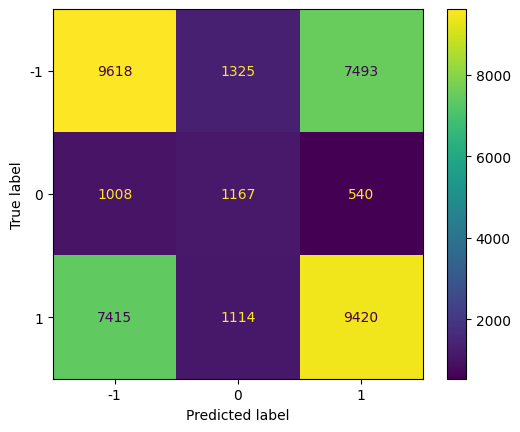

In [18]:
#plotting confusion matrix, actual|pred is the order for confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

ax= plt.subplot()
cm1 = confusion_matrix(Y_test, predicted)
disp = ConfusionMatrixDisplay(cm1)
disp.plot(ax=ax)
ax.xaxis.set_ticklabels(['-1','0', '1']); ax.yaxis.set_ticklabels(['-1','0', '1']);

### Testing The Model Using Different Datasets To Get Prediction Accuracies ###

In [12]:
# Test with cosmos redit sentiment data
cosmos_reddit_test = pd.read_csv('en_cosmos_reddit_df.csv')
cosmos_reddit_test_data = cosmos_reddit_test['text']
cosmos_reddit_test_data

0         family mormon have never tried explain them t...
1        buddhism has very much lot compatible with chr...
2        seriously don say thing first all they won get...
3        what you have learned yours and only yours wha...
4        for your own benefit you may want read living ...
                               ...                        
31643            coincidentally that how randia works too 
31644               here screen cap his live telecast jpg 
31645              shit forgot today date take upvote sir 
31646     fell for this good one also shows overtly opt...
31647            thought now going ban 2000 rupee note lol
Name: text, Length: 31648, dtype: object

In [13]:
X_new_counts = countVectorizer.transform(cosmos_reddit_test_data)
X_new_tfidf = tf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
predicted

array(['positive', 'negative', 'negative', ..., 'negative', 'positive',
       'negative'], dtype=object)

In [14]:
cosmos_reddit_test_sentiment = cosmos_reddit_test['sentiment']
accuracy_score(cosmos_reddit_test_sentiment, predicted)

correct:  12515
passed:  0
accuracy:  0.39544362992922144


In [15]:
# Test with cosmos twitter sentiment data
cosmos_twitter_test = pd.read_csv('en_cosmos_twitter_df.csv')
cosmos_twitter_test_data = cosmos_twitter_test['text']
cosmos_twitter_test_data

0        when modi promised “minimum government maximum...
1        talk all the nonsense and continue all the dra...
2        what did just say vote for modi  welcome bjp t...
3        asking his supporters prefix chowkidar their n...
4        answer who among these the most powerful world...
                               ...                        
91953                 india cant survive another term modi
91954    modi hands down indians are too influenced bol...
91955    rajdeep known congress supporters from day one...
91956                       its bcoz they hate modi thats 
91957    narendra modi begin campaign trail address pub...
Name: text, Length: 91958, dtype: object

In [16]:
X_new_counts = countVectorizer.transform(cosmos_twitter_test_data)
X_new_tfidf = tf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
predicted

array(['negative', 'negative', 'negative', ..., 'positive', 'negative',
       'neutral'], dtype=object)

In [17]:
cosmos_twitter_test_sentiment = cosmos_twitter_test['sentiment']
accuracy_score(cosmos_twitter_test_sentiment, predicted)

correct:  32583
passed:  0
accuracy:  0.35432480045238046


In [18]:
# Test with fifa twitter data
fifa_test = pd.read_csv('en_fifa_df.csv')
fifa_test_data = fifa_test['text']
fifa_test_data

0        What are we drinking today @TucanTribe \n@MadB...
1        Amazing @CanadaSoccerEN  #WorldCup2022 launch ...
2        Worth reading while watching #WorldCup2022 htt...
3        Golden Maknae shinning bright\n\nhttps://t.co/...
4        If the BBC cares so much about human rights, h...
                               ...                        
21793    Leave #FIFA alone! Let the #soccer prevail and...
21794    Three stars on this logo after WC\n#WorldCup20...
21795    What is really sickening is the west trying to...
21796    Messi’s last World Cup! I am going with Argent...
21797    Who will win the World Cup 2022?\n🏆⚽️\n\n@FIFA...
Name: text, Length: 21798, dtype: object

In [19]:
X_new_counts = countVectorizer.transform(fifa_test_data)
X_new_tfidf = tf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
predicted

array(['negative', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [20]:
fifa_test_sentiment = fifa_test['sentiment']
accuracy_score(fifa_test_sentiment, predicted)

correct:  7793
passed:  0
accuracy:  0.3575098632902101


## Combining datasets together since the accuracy wasn't too high, and training on combined dataset instead. Also trying a multitude of various classifiers

In [53]:
climate_data = en_climate_df['text']
cosmos_reddit = pd.read_csv('en_cosmos_reddit_df.csv')
cosmos_reddit_data = cosmos_reddit_test['text']
concatenated_data = pd.concat([climate_data, cosmos_reddit_data])

# checking the lengths
print("verifying the lengths of the data")
print(len(climate_data))
print(len(cosmos_reddit))
print(len(concatenated_data))

climate_y = en_climate_df['sentiment']
cosmos_reddit_y = cosmos_reddit['sentiment']
concatenated_y = pd.concat([climate_y, cosmos_reddit_y])

# checking the lengths
print("\n")
print("verifying the lengths of the y value arrays")
print(len(climate_y))
print(len(cosmos_reddit_y))
print(len(concatenated_y))

X_train, X_test, Y_train, Y_test = train_test_split(concatenated_data, concatenated_y, random_state=15, train_size=0.6)
# df = pd.DataFrame(data={'text': data_text, 'sentiment': data_sentiment})

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.neighbors import KNeighborsClassifier

countVectorizer = CountVectorizer()
X_train = countVectorizer.fit_transform(X_train)
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
X_train = tf_transformer.transform(X_train)
clf = KNeighborsClassifier(3).fit(X_train, Y_train)
tester = ['yayyy!', 'terrible', "she walked to the right", "woohoo", "I don't feel good", "sad", "feel kinda blue"]
X_new_counts = countVectorizer.transform(tester)
X_new_tfidf = tf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
predicted


verifying the lengths of the data
97749
31648
129397


verifying the lengths of the y value arrays
97749
31648
129397


array(['neutral', 'neutral', 'positive', 'neutral', 'neutral', 'negative',
       'neutral'], dtype=object)

In [54]:
# Testing on original test set
X_new_counts = countVectorizer.transform(X_test)
X_new_tfidf = tf_transformer.transform(X_new_counts)
predicted = clf.predict(X_new_tfidf)
predicted
Y_test=Y_test.tolist()
# Get accuracy on the original test set
correct = 0
passed = 0
# print(len(predicted))
for i in range(len(predicted)):
#     print(i)
    try:
        if Y_test[i] == predicted[i]:
            correct += 1
    except KeyError:
        passed += 1
        pass
print("correct: ", correct)
print("passed: ", passed)
print("accuracy: ", correct/(len(predicted)-passed))

correct:  22603
passed:  0
accuracy:  0.43669699955563285


In [ ]:
# Testing on FIFA dataset (TODO)

## Trying part 3, Using pretrained HuggingFace model to test model

In [55]:
# !pip install pysentimiento

In [56]:
import pysentimiento 
# for 

# testing on original climate dataset first 
X = en_climate_df['text']
Y = en_climate_df['sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, train_size=0.6)

train_predictions = pysentimiento.create_analyzer(task="sentiment", lang="es").predict(X_train)

loading configuration file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/config.json from cache at /Users/deepansha/.cache/huggingface/transformers/034fd09e9530137fb6e6c042529972a92619fb02df8b40e7a4cfc50090943c46.ba567638740ab836f48b011b60649b828abc78b1aafda381bf9ac862d58d1ff5
Model config RobertaConfig {
  "_name_or_path": "pysentimiento/robertuito-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
 

Map:   0%|          | 0/58649 [00:00<?, ? examples/s]

The following columns in the test set don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: text. If text are not expected by `RobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 58649
  Batch size = 32


In [72]:
print(train_predictions[0])
x = train_predictions[0].output
print(x)

AnalyzerOutput(output=NEG, probas={NEG: 0.926, NEU: 0.056, POS: 0.018})
NEG


In [ ]:
train_predictions = [x.output for x in train_predictions]
train_predictions = ["positive" if x == 'POS' else "negative" if x == 'NEG' else "neutral" for x in train_predictions]
train_predictions

In [ ]:
# Accuracy on trainset
correct = 0
passed = 0
for i in range(len(predicted)):
    try:
        if Y_test[i] == predicted[i]:
            correct += 1
    except KeyError:
        passed += 1
        pass
print("accuracy: ", correct/(len(predicted)-passed))

print(res[0])

In [ ]:
# Accuracy on testset
correct = 0
passed = 0
for i in range(len(predicted)):
    try:
        if Y_test[i] == predicted[i]:
            correct += 1
    except KeyError:
        passed += 1
        pass
print("accuracy: ", correct/(len(predicted)-passed))

print(res[0])

From our premiliary results shown above, we can see the base model we trained on the the Reddit Climate Change Dataset with the KNeighborsClassifier has a test accuracy* (on the original dataset training data) of 0.4284 or 42.84%.

If we use other datasets to test the model, we got 0.3956 or 39.57% for Reddit Sentiment Analysis Dataset, 0.3542 or 35.42% for Twitter Sentiment Analysis Dataset, and 0.3578 or 35.78% for FIFA Tweets Dataset. The results are lower than the accuracy on the original testing data.

Such a result was expected, as the trained model has generalisation error on unseen data, and compared to data from the original dataset, the error on different datasets was expected to be larger. However, we can see that the general prediction accuracy or performance of the trained model is quite low, even on the original dataset test data. This might mean that our model is not optimal and there could be other options to explore and improve the accuracy.

Thus, we may try to use a different algorithm other than the KNeighborsClassifier to train the model, to compare its performance with this model. In addition, we also plan to train the model on different datasets, to see if there is a difference in models trained with different training data. 

**The premiliary result accuracies were calculated using "number of correct prediction/number of all predictions" to get quick feedback. We will use other evaluation metrics as described in the above section in our final evaluation.*

# Ethics & Privacy

Due to the datasets all coming from real people collected through social media, there are ethical concerns over their consent in being part of this project as points of data, even with their words and personal information accessible through the media the data is extracted from (Twitter and Reddit).
Proper data cleaning and handling would require giving those people as much anonymity that is possible to be given, such as removing their usernames/handles and even the permalink/id to avoid being traced back to a user or community.

The goal of this project is to see if, given the labels already assigned in some datasets, how well can a model be trained on them to label other datasets?
As the data comes from a sample of people in the population of those respective media for certain topics, the text content may be biased towards/against certain topics or communities.
Some datasets have already included sentiment labels to indicate if they are positive, negative, or neutral.
Using this data in training may contribute to the model’s perceived connotation of those and related texts in unlabeled datasets.
Conclusions drawn from those results may be harmful to a degree regardless of actual intent or content because of the nature of applying sentiment analysis.
This project and those that are working with it do not show any personal support or opposition for any of the data gathered, and to keep the integrity of the project itself, all usable content (those in the English language) can be used without censorship as to not influence the direction of the model toward our personal preferences.


# Team Expectations 

* Communication channel is FB Messenger.
* Notify of any changes of plans in the communication channel as soon as possible.
* Confirm or reschedule meeting times for upcoming week if you know that you will not be able to meet at the specified time. 
* Come prepared to meetings with completed tasks.
* Ask for assistance anytime you feel like you need it.
* Don’t be afraid to pair up to learn some new skill together or help out one another

# Project Timeline Proposal

| Meeting Date and Time | Completed Before Meeting  | Discuss at Meeting |
|---|---|---|
| 2/22 @2 PM |  Brainstormed topics/questions (all)  | Determined best form of communication; Discussed and decided on final project topic; discussed hypothesis; began background research | 
| 3/3 @5 PM  | Read reviews of our project  | Tailor our project based on what we learned from peer reviews; discuss further steps   |
| 3/8 @8 PM  | Prepare your part for checkpoint submission, Import and wrangle Data, do some EDA | Resolve any issues, submit Checkpoint; Review/edit wrangling; discuss further steps   |
| 3/12 @8 PM | Be up to date, bring in any concerns or what still needs to be done. | Review of what is done so far. Discuss further steps |
| 3/16 @6 PM | Complete your part(s). Prepare any questions and/or concerns. Last chance to change something| Discuss last steps towards project completion. Distribute work to complete the project |
| 3/22 @2 PM | Finish all the gaps, fill in all the nits and bits  | Turn in the Project  |

# Footnotes
<a name="fakenews"></a>1.[^](#fakenews): LHoy, N., &amp; Koulouri, T. (2022). Exploring the generalisability of fake news detection models. *2022 IEEE International Conference on Big Data (Big Data)*. https://doi.org/10.1109/bigdata55660.2022.10020583<br> 
<a name="fakenews2"></a>2.[^](#fakenews2): Blackledge, C., &amp; Atapour-Abarghouei, A. (2021). Transforming fake news: Robust generalisable news classification using Transformers. *2021 IEEE International Conference on Big Data (Big Data)*. https://doi.org/10.1109/bigdata52589.2021.9671970<br>
<a name="hatespeech"></a>3.[^](#hatespeech): Yin W, Zubiaga A. 2021. Towards generalisable hate speech detection: a review on obstacles and solutions. *PeerJ Computer Science* 7:e598 https://doi.org/10.7717/peerj-cs.598<br>
<a name="sentian"></a>4.[^](#sentian): Moore, A., & Rayson, P. (2018). Bringing replication and reproduction together with generalisability in NLP: Three reproduction studies for target dependent sentiment analysis. *arXiv preprint arXiv:1806.05219*<br>
<a name="redditclimate"></a>5.[^](#redditclimate): https://www.kaggle.com/datasets/pavellexyr/the-reddit-climate-change-dataset<br>
<a name="twitterredditsentian"></a>6.[^](#twitterredditsentian): https://www.kaggle.com/datasets/cosmos98/twitter-and-reddit-sentimental-analysis-dataset<br>
<a name="fifatweets"></a>7.[^](#fifatweets): https://www.kaggle.com/datasets/tirendazacademy/fifa-world-cup-2022-tweets<br>
<a name="scikit1"></a>8.[^](#scikit1): https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#exercise-2-sentiment-analysis-on-movie-reviews<br>
<a name="featextract"></a>9.[^](#featextract): Zareapoor, M., &amp; K. R, S. (2015). Feature extraction or feature selection for text classification: A case study on phishing email detection. *International Journal of Information Engineering and Electronic Business*, 7(2), 60–65. https://doi.org/10.5815/ijieeb.2015.02.08<br>
<a name="wiki"></a>10.[^](#wiki): https://en.wikipedia.org/wiki/Tf%E2%80%93idf<br>
<a name="medium"></a>11.[^](#medium): https://medium.com/geekculture/text-feature-extraction-3-3-word-embeddings-model-e98f3d270dce<br>
<a name="scikit2"></a>12.[^](#scikit2): https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html<br>
<a name="empstudy"></a>13.[^](#empstudy): Sun, X., Liu, X., Hu, J., &amp; Zhu, J. (2014). Empirical studies on the NLP techniques for source code data preprocessing. *Proceedings of the 2014 3rd International Workshop on Evidential Assessment of Software Technologies*. https://doi.org/10.1145/2627508.2627514<br>
<a name="featextractreview"></a>14.[^](#featextractreview): Asghar, M. Z., Khan, A., Ahmad, S., & Kundi, F. M. (2014). A review of feature extraction in sentiment analysis. *Journal of Basic and Applied Scientific Research*, 4(3), 181-186.<br>
<a name="top8"></a>15.[^](#top8): https://analyticsindiamag.com/top-8-pre-trained-nlp-models-developers-must-know/<br>
<a name="huggingface1"></a>16.[^](#huggingface1): https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis?text=Yay%21%21<br>
<a name="huggingface2"></a>17.[^](#huggingface2): https://huggingface.co/michelecafagna26/gpt2-medium-finetuned-sst2-sentiment?text=yayy%21%21<br>
<a name="confusionMatrix"></a>18.[^](#confusionMatrix): https://en.wikipedia.org/wiki/Confusion_matrix<br>